<a href="https://colab.research.google.com/github/sketch579/Pizza-sales-analysis/blob/main/Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

sns.set()

import warnings
warnings.filterwarnings("ignore")

In [82]:
order_details =pd.read_csv("/content/order_details.csv")

order_details.head()

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


In [83]:
orders =pd.read_csv("/content/orders.csv")

orders.head()

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


In [84]:
pizza_types =pd.read_csv("/content/pizza_types.csv", encoding='latin1')

pizza_types.head()

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


In [85]:
pizzas =pd.read_csv("/content/pizzas.csv")

pizzas.head()

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


#Combining all datasets

In [86]:
df1 = pd.merge(order_details, orders, on="order_id" )

In [87]:
df2 = pd.merge(df1, pizzas, on="pizza_id")

In [88]:
df = pd.merge(df2, pizza_types, on="pizza_type_id")

In [89]:
df.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,5,2,mexicana_m,1,2015-01-01,11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_details_id  48620 non-null  int64  
 1   order_id          48620 non-null  int64  
 2   pizza_id          48620 non-null  object 
 3   quantity          48620 non-null  int64  
 4   date              48620 non-null  object 
 5   time              48620 non-null  object 
 6   pizza_type_id     48620 non-null  object 
 7   size              48620 non-null  object 
 8   price             48620 non-null  float64
 9   name              48620 non-null  object 
 10  category          48620 non-null  object 
 11  ingredients       48620 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 4.5+ MB


Total Revenue

In [91]:
df["revenue"] = df["quantity"] * df["price"]
total_revenue = df["revenue"].sum()

total_revenue

np.float64(817860.05)

Total Quantity

In [92]:
total_quantity = df['quantity'].sum()

total_quantity

np.int64(49574)

Total Orders

In [93]:
total_orders = df['order_id'].nunique()

total_orders

21350

Types of pizza sold

In [94]:
pizza_types_sold = df['pizza_type_id'].nunique()

pizza_types_sold

32

Average price of the pizzas

In [95]:
average_price =  df['price'].mean()

average_price

np.float64(16.494132044426163)

Peak Hours of Sale

In [100]:
orders['datetime'] = pd.to_datetime(orders['date'] + ' ' + orders['time'])
orders['hour'] = orders['datetime'].dt.hour

In [97]:
df.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients,revenue
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",16.00
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",18.50
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",20.75
4,5,2,mexicana_m,1,2015-01-01,11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",16.00


In [103]:
df["hour"] = pd.to_datetime(df["time"]).dt.hour

In [104]:
peak_hours = df.groupby("hour")["revenue"].sum().sort_values(ascending=False)

peak_hours.head(5) #top 5

,revenue
hour,
12,111877.90
13,106065.70
18,89296.85
17,86237.45
19,72628.90


Total Sales by weekdays

In [105]:
orders["day"] = orders["datetime"].dt.day_name()

In [106]:
df = order_details.merge(orders[["order_id", "datetime", "day"]], on="order_id") \
                  .merge(pizzas, on="pizza_id") \
                  .merge(pizza_types, on="pizza_type_id")

df["revenue"] = df["quantity"] * df["price"]

In [107]:
sales_by_days = df.groupby("day")["revenue"].sum().sort_values(ascending=False)

sales_by_days

,revenue
day,
Friday,136073.90
Thursday,123528.50
Saturday,123182.40
Wednesday,114408.40
Tuesday,114133.80
Monday,107329.55
Sunday,99203.50


Top 5 Bestselling Pizzas

In [108]:
top5_pizzas = df.groupby("name")["quantity"].sum().sort_values(ascending=False).head(5)

top5_pizzas

,quantity
name,
The Classic Deluxe Pizza,2453
The Barbecue Chicken Pizza,2432
The Hawaiian Pizza,2422
The Pepperoni Pizza,2418
The Thai Chicken Pizza,2371


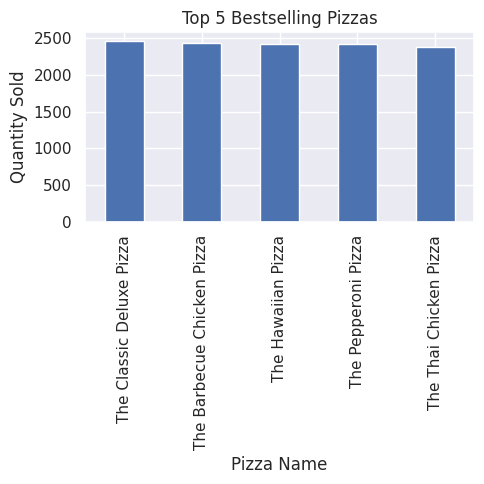

In [109]:
plt.figure(figsize=(5,5))

top5_pizzas.plot(kind="bar")

plt.title("Top 5 Bestselling Pizzas")
plt.xlabel("Pizza Name")
plt.ylabel("Quantity Sold")

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

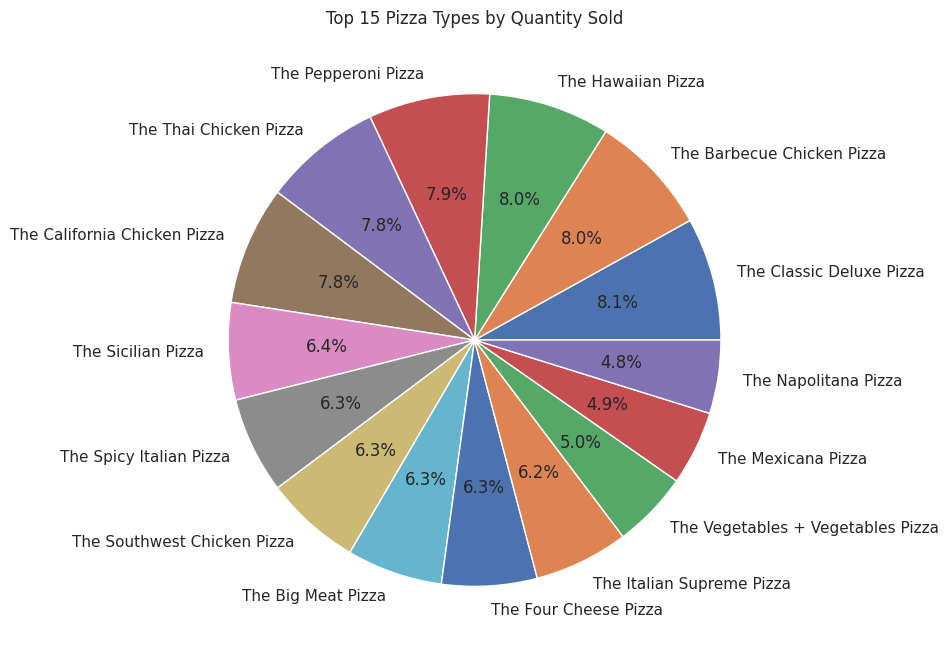

In [110]:
top15 = df.groupby("name")["quantity"].sum().sort_values(ascending=False).head(15)

plt.figure(figsize=(8,8))
top15.plot(kind="pie", autopct="%1.1f%%")

plt.title("Top 15 Pizza Types by Quantity Sold")
plt.ylabel("")
plt.show()

Sales made in each month

In [111]:
orders["month"] = orders["datetime"].dt.month_name()

In [112]:
df = order_details.merge(orders, on="order_id") \
                  .merge(pizzas, on="pizza_id") \
                  .merge(pizza_types, on="pizza_type_id")

df["revenue"] = df["quantity"] * df["price"]

In [113]:
month_order = ["January","February","March","April","May","June",
               "July","August","September","October","November","December"]

monthly_sales = df.groupby("month")["revenue"].sum().reindex(month_order)

monthly_sales

,revenue
month,
January,69793.30
February,65159.60
March,70397.10
April,68736.80
May,71402.75
June,68230.20
July,72557.90
August,68278.25
September,64180.05


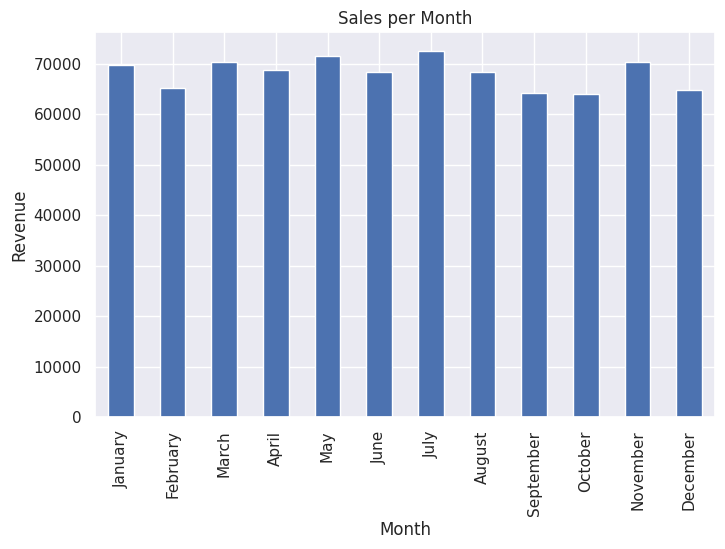

In [114]:
monthly_sales.plot(kind="bar", figsize=(8,5))
plt.title("Sales per Month")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()

Pizza types not doing well on the menu

In [115]:
#worst by revenue

worst5_by_revenue = df.groupby("name")["revenue"].sum().sort_values().head(5)
worst5_by_revenue

,revenue
name,
The Brie Carre Pizza,11588.50
The Green Garden Pizza,13955.75
The Spinach Supreme Pizza,15277.75
The Mediterranean Pizza,15360.50
The Spinach Pesto Pizza,15596.00


In [116]:
#worst by quantity

worst5_by_quantity = df.groupby("name")["quantity"].sum().sort_values().head(5)
worst5_by_quantity

,quantity
name,
The Brie Carre Pizza,490
The Mediterranean Pizza,934
The Calabrese Pizza,937
The Spinach Supreme Pizza,950
The Soppressata Pizza,961


In [117]:
merged_worst = pd.merge(worst5_by_quantity, worst5_by_revenue, on="name", how="outer")
merged_worst

,quantity,revenue
name,,
The Brie Carre Pizza,490.0,11588.50
The Calabrese Pizza,937.0,NaN
The Green Garden Pizza,NaN,13955.75
The Mediterranean Pizza,934.0,15360.50
The Soppressata Pizza,961.0,NaN
The Spinach Pesto Pizza,NaN,15596.00
The Spinach Supreme Pizza,950.0,15277.75
